In [1]:
# Model was not trained on: (which are the test data) 
# - individual 1
# - individual 8
# - individual 11

test_df.iloc[2000]

NameError: name 'test_df' is not defined

In [2]:
import pandas as pd
import numpy as np
import hdbscan
import umap

In [3]:
#!pip install hdbscan
#!pip install umap-learn

In [4]:
test_df = pd.read_csv("data/COMA_top_data/test_nasi_top_metadata.csv")
train_df = pd.read_csv("data/COMA_top_data/train_nasi_top_metadata.csv")

In [5]:
test_latents = np.load("data/new_dataset_data/test_newdataset_latents.npy")
train_latents = np.load("data/new_dataset_data/train_newdataset_latents.npy")

In [6]:
print(f"Test latents shape: {test_latents.shape}, train latents shape: {train_latents.shape}")

Test latents shape: (1849, 16), train latents shape: (4952, 16)


In [7]:
print(f"Test dataframe shape: {test_df.shape}, train dataframe shape: {train_df.shape}")
assert test_df.shape[0] == test_latents.shape[0]
assert train_df.shape[0] == train_latents.shape[0]

Test dataframe shape: (4596, 6), train dataframe shape: (15869, 6)


AssertionError: 

In [8]:
test_df.iloc[[5]]

,Unnamed: 0,individual_id,expression_id,individual_name,expression_name,mesh_file_name
5,5,2,0,FaceTalk_170731_00024_TA,bareteeth,bareteeth.000006.ply


In [9]:
#train_df.iloc[[5]]
all_df = pd.concat([train_df, test_df])

In [10]:
all_df.shape

(20465, 6)

In [11]:
#all_df.tail(10)

In [12]:
all_latents = np.vstack((train_latents, test_latents))

In [13]:
assert (all_latents[1] == train_latents[1]).all()

I do clustering here, instead of loading preprocessed data

Silhouette method for number of clusters

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm import tqdm

In [ ]:
calculate_num_clusters = False
if calculate_num_clusters:
    sil = []
    kmax = 150

    Sum_of_squared_distances = [] #for elbow method
    ks = range(2, kmax+1)
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in tqdm(ks):
      kmeans = KMeans(n_clusters = k).fit(all_latents)
      labels = kmeans.labels_
      sil.append(silhouette_score(all_latents, labels, metric = 'euclidean'))
      Sum_of_squared_distances.append(kmeans.inertia_) #for elbow method

In [ ]:
max(labels)
plt.plot(range(2, kmax+1),sil, scalex=True, scaley=True, data=None)
plt.title("Silouhette score")


In [130]:
cluster = KMeans(n_clusters = 12).fit(all_latents)


Elbow method for number of clusters

In [ ]:
len(Sum_of_squared_distances)

In [ ]:
len(ks)

In [ ]:

plt.plot(ks, Sum_of_squared_distances)
#plt.plot(range(2, kmax+1),Sum_of_squared_distances, scalex=True, scaley=True, data=None)

plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [15]:
cluster = hdbscan.HDBSCAN(min_cluster_size=10,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(all_latents)
#for now it was trial and error, however the correct "minclustersize" can be calculated using some trials

In [16]:
max(cluster.labels_)

108

In [17]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
def plotClusters(funClusters, latents):
    umap_data = umap.UMAP(n_neighbors=100, n_components=2, min_dist=0.0, metric='cosine').fit_transform(latents)
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = funClusters.labels_

    # Visualize clusters
    fig, ax = plt.subplots(figsize=(10, 7))
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
    plt.colorbar()
    plt.title("Visualization of one instance of clustering through HDBSCAN")

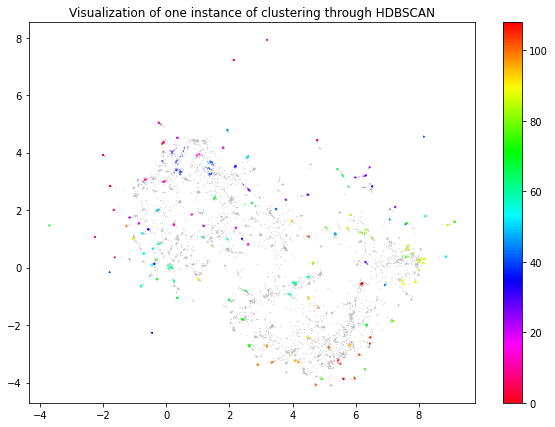

In [18]:
plotClusters(cluster, all_latents)

In [ ]:
import numpy as np
from scipy import spatial
import copy

print("ZERO")
# test points
pts = copy.deepcopy(all_latents)

print("ONE")
# two points which are fruthest apart will occur as vertices of the convex hull
candidates = pts[spatial.ConvexHull(pts).vertices]

print("TWO")
# get distances between each pair of candidate points
dist_mat = spatial.distance_matrix(candidates, candidates)

print("THREE")
# get indices of candidates that are furthest apart
i, j = np.unravel_index(dist_mat.argmax(), dist_mat.shape)

print(candidates[i], candidates[j])

ZERO
ONE
